## Starting with Data Visualization for Immo-Eliza

### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


### Importing dataset from the address

In [3]:
file_path = "/Users/mac/Desktop/house_details_v1.csv"
df = pd.read_csv(file_path)

### printing first 5 property details

In [4]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 28)
display(df)

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,Bedroom Count,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude
0,10681697,Rue Colompré,108,0,0.0,Liege,4020,RESIDENTIAL,WALLONIE,Liège,HOUSE,149000.0,residential_sale,1899.0,4.0,137.0,INSTALLED,True,False,True,0,110.0,2.0,False,GOOD,F,50.640237,5.599121
1,10676490,drève du parc,45,0,1.0,Bruxelles,1000,URBAN,BRUSSELS,Brussels,APARTMENT,330000.0,residential_sale,2025.0,2.0,91.0,USA_INSTALLED,0,False,True,0,0.0,4.0,False,AS_NEW,A,50.866596,4.344900
2,10675312,Boulevard du Triomphe,201,B42,4.0,Auderghem,1160,URBAN,BRUSSELS,Brussels,FLAT_STUDIO,255500.0,residential_sale,2022.0,0.0,46.0,USA_HYPER_EQUIPPED,False,False,True,0,0.0,0.0,False,AS_NEW,A,50.816396,4.398940
3,10681830,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,APARTMENT,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877
4,10681832,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,PENTHOUSE,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,10671009,0,0,0,3.0,WOLUWÉ-SAINT-PIERRE,1150,0,BRUSSELS,Brussels,APARTMENT,450000.0,residential_sale,1991.0,3.0,95.0,USA_INSTALLED,0,True,True,0,0.0,0.0,0,0,C,0.000000,0.000000
10792,10620876,Kapelstraat,40,0,0.0,TERHAGEN,2840,0,FLANDERS,Antwerp,HOUSE,209000.0,residential_sale,1849.0,3.0,100.0,INSTALLED,0,True,0,0,57.0,2.0,0,GOOD,C,51.081842,4.393396
10793,10670995,0,0,0,0.0,MONT-SAINT-GUIBERT,1435,0,WALLONIE,Nivelles,HOUSE,550000.0,residential_sale,1989.0,4.0,210.0,HYPER_EQUIPPED,0,True,True,True,900.0,4.0,True,GOOD,C,0.000000,0.000000
10794,10670958,0,0,0,0.0,WÉPION,5100,0,WALLONIE,Namur,HOUSE,595000.0,residential_sale,1963.0,5.0,223.0,INSTALLED,0,True,0,0,1135.0,4.0,0,0,E,0.000000,0.000000


### checking the missing values

In [5]:
df.isna().any()

id                   False
Street               False
Housenumber          False
Box                  False
Floor                False
City                 False
Postalcode           False
Property type        False
Region               False
District             False
Subtype              False
Price                False
Type of sale         False
Construction year    False
Bedroom Count        False
Habitable surface    False
Kitchen type         False
Furnished            False
Fireplace            False
Terrace              False
Garden               False
Garden surface       False
Facades              False
SwimmingPool         False
Condition            False
EPC score            False
Latitude             False
Longitude            False
dtype: bool

* Since we have already replaced the missing values with 0 we are not getting true for df.isna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10796 entries, 0 to 10795
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10796 non-null  int64  
 1   Street             10796 non-null  object 
 2   Housenumber        10796 non-null  object 
 3   Box                10796 non-null  object 
 4   Floor              10796 non-null  float64
 5   City               10796 non-null  object 
 6   Postalcode         10796 non-null  object 
 7   Property type      10796 non-null  object 
 8   Region             10796 non-null  object 
 9   District           10796 non-null  object 
 10  Subtype            10796 non-null  object 
 11  Price              10796 non-null  float64
 12  Type of sale       10796 non-null  object 
 13  Construction year  10796 non-null  float64
 14  Bedroom Count      10796 non-null  float64
 15  Habitable surface  10796 non-null  float64
 16  Kitchen type       107

In [7]:
df.columns.to_list()

['id',
 'Street',
 'Housenumber',
 'Box',
 'Floor',
 'City',
 'Postalcode',
 'Property type',
 'Region',
 'District',
 'Subtype',
 'Price',
 'Type of sale',
 'Construction year',
 'Bedroom Count',
 'Habitable surface',
 'Kitchen type',
 'Furnished',
 'Fireplace',
 'Terrace',
 'Garden',
 'Garden surface',
 'Facades',
 'SwimmingPool',
 'Condition',
 'EPC score',
 'Latitude',
 'Longitude']

#### Counter for the properties which does not have a selling price value

In [8]:
count = 0
list_property_values = df["Price"].to_list()
#print(list_property_values)
for i in list_property_values:
    if i == 0:
        count += 1
print(count)    

745


#### Cleaning the properties with 0 price value

In [9]:
df = df[df["Price"] != 0]
display(df.head())

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,Bedroom Count,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude
0,10681697,Rue Colompré,108,0,0.0,Liege,4020,RESIDENTIAL,WALLONIE,Liège,HOUSE,149000.0,residential_sale,1899.0,4.0,137.0,INSTALLED,True,False,True,0,110.0,2.0,False,GOOD,F,50.640237,5.599121
1,10676490,drève du parc,45,0,1.0,Bruxelles,1000,URBAN,BRUSSELS,Brussels,APARTMENT,330000.0,residential_sale,2025.0,2.0,91.0,USA_INSTALLED,0,False,True,0,0.0,4.0,False,AS_NEW,A,50.866596,4.344900
2,10675312,Boulevard du Triomphe,201,B42,4.0,Auderghem,1160,URBAN,BRUSSELS,Brussels,FLAT_STUDIO,255500.0,residential_sale,2022.0,0.0,46.0,USA_HYPER_EQUIPPED,False,False,True,0,0.0,0.0,False,AS_NEW,A,50.816396,4.398940
3,10681830,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,APARTMENT,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877
4,10681832,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,PENTHOUSE,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877


#### Counter of properties with swimming pool

In [10]:
count = 0
for i in df["SwimmingPool"].to_list():
    if i != 0:
        count += 1

print(count)

10051


In [11]:
df.shape
#df.columns

(10051, 28)

#### Checking for the duplicate properties

In [12]:
duplicates = df.duplicated()
display(df[duplicates])

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,Bedroom Count,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude
161,10684099,Quartier Bois de mai,.,.,0.0,Lillois-Witterzée,1428,RESIDENTIAL,WALLONIE,Nivelles,VILLA,2295000.0,residential_sale,1972.0,4.0,485.0,HYPER_EQUIPPED,True,True,True,True,4189.0,4.0,True,JUST_RENOVATED,C,50.645670,4.367120
167,10684113,Quartier du Bois de Mai,.,.,0.0,Braine-l'Alleud,1420,RESIDENTIAL,WALLONIE,Nivelles,VILLA,2295000.0,residential_sale,1972.0,4.0,485.0,HYPER_EQUIPPED,True,True,True,True,4189.0,4.0,True,JUST_RENOVATED,C,50.606173,4.449400
304,10601428,Van Overbekelaan,200,34,10.0,Ganshoren,1083,URBAN,BRUSSELS,Brussels,APARTMENT,219000.0,residential_sale,1979.0,2.0,98.0,SEMI_EQUIPPED,0,True,True,0,0.0,2.0,0,GOOD,D,50.875481,4.308817
1578,10682327,Quartier Joli-Bois,.,.,0.0,Waterloo,1410,RESIDENTIAL,WALLONIE,Nivelles,VILLA,695000.0,residential_sale,1967.0,5.0,252.0,HYPER_EQUIPPED,False,True,True,True,786.0,4.0,0,TO_BE_DONE_UP,F,50.700690,4.402130
2014,10681864,Maaltebruggestraat,103,0,0.0,Gent,9000,URBAN,FLANDERS,Gent,HOUSE,350000.0,residential_sale,0.0,2.0,127.0,HYPER_EQUIPPED,False,False,True,True,94.0,2.0,False,GOOD,B,51.030118,3.710389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,10671102,Bondgenotenlaan,46,31,3.0,Heist-aan-Zee,8301,0,FLANDERS,Brugge,APARTMENT,225000.0,residential_sale,0.0,2.0,65.0,INSTALLED,True,False,0,0,0.0,0.0,False,GOOD,C,51.335579,3.239296
10730,10670963,Rue Marexhe,9,0,0.0,Herstal,4040,0,WALLONIE,Liège,APARTMENT_BLOCK,289000.0,residential_sale,0.0,6.0,301.0,0,0,True,True,0,166.0,2.0,0,GOOD,C,50.659969,5.624853
10735,10670964,Clos du Vieux Bure,7,0,0.0,Liège,4000,0,WALLONIE,Liège,HOUSE,585000.0,residential_sale,2016.0,4.0,270.0,HYPER_EQUIPPED,0,True,True,True,1011.0,3.0,0,AS_NEW,B,50.655555,5.554506
10750,10670982,Keizer Karelstraat,16/301,0,3.0,Gent,9000,0,FLANDERS,Gent,TRIPLEX,297000.0,residential_sale,0.0,2.0,70.0,INSTALLED,0,True,0,0,0.0,2.0,0,0,A,51.052994,3.731459


#### Cleaning the duplicate properties

In [13]:
# dropping the duplicates
duplicates_1 = df.duplicated(subset=[
 'Street',
 'Housenumber',
 'Box',
 'Floor',
 'City',
 'Postalcode',
 'Property type',
 'Region',
 'District',
 'Subtype',
 'Price',
 'Type of sale',
 'Construction year',
 'Bedroom Count',
 'Habitable surface',
 'Kitchen type',
 'Furnished',
 'Fireplace',
 'Terrace',
 'Garden',
 'Garden surface',
 'Facades',
 'SwimmingPool',
 'Condition',
 'EPC score',
 'Latitude',
 'Longitude'])
display(df[duplicates_1])

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,Bedroom Count,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude
161,10684099,Quartier Bois de mai,.,.,0.0,Lillois-Witterzée,1428,RESIDENTIAL,WALLONIE,Nivelles,VILLA,2295000.0,residential_sale,1972.0,4.0,485.0,HYPER_EQUIPPED,True,True,True,True,4189.0,4.0,True,JUST_RENOVATED,C,50.645670,4.367120
167,10684113,Quartier du Bois de Mai,.,.,0.0,Braine-l'Alleud,1420,RESIDENTIAL,WALLONIE,Nivelles,VILLA,2295000.0,residential_sale,1972.0,4.0,485.0,HYPER_EQUIPPED,True,True,True,True,4189.0,4.0,True,JUST_RENOVATED,C,50.606173,4.449400
304,10601428,Van Overbekelaan,200,34,10.0,Ganshoren,1083,URBAN,BRUSSELS,Brussels,APARTMENT,219000.0,residential_sale,1979.0,2.0,98.0,SEMI_EQUIPPED,0,True,True,0,0.0,2.0,0,GOOD,D,50.875481,4.308817
715,10683501,Fortem,64,0,0.0,Alveringem,8690,0,FLANDERS,Veurne,HOUSE,259000.0,residential_sale,0.0,1.0,104.0,SEMI_EQUIPPED,False,False,0,True,1247.0,0.0,False,TO_RENOVATE,F,51.016703,2.730184
754,10659704,Sint-Christianastraat,18,0,0.0,Dendermonde,9200,0,FLANDERS,Dendermonde,HOUSE,599000.0,residential_sale,1987.0,4.0,378.0,INSTALLED,0,True,0,True,571.0,3.0,0,TO_BE_DONE_UP,B,51.032507,4.090211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,10671102,Bondgenotenlaan,46,31,3.0,Heist-aan-Zee,8301,0,FLANDERS,Brugge,APARTMENT,225000.0,residential_sale,0.0,2.0,65.0,INSTALLED,True,False,0,0,0.0,0.0,False,GOOD,C,51.335579,3.239296
10730,10670963,Rue Marexhe,9,0,0.0,Herstal,4040,0,WALLONIE,Liège,APARTMENT_BLOCK,289000.0,residential_sale,0.0,6.0,301.0,0,0,True,True,0,166.0,2.0,0,GOOD,C,50.659969,5.624853
10735,10670964,Clos du Vieux Bure,7,0,0.0,Liège,4000,0,WALLONIE,Liège,HOUSE,585000.0,residential_sale,2016.0,4.0,270.0,HYPER_EQUIPPED,0,True,True,True,1011.0,3.0,0,AS_NEW,B,50.655555,5.554506
10750,10670982,Keizer Karelstraat,16/301,0,3.0,Gent,9000,0,FLANDERS,Gent,TRIPLEX,297000.0,residential_sale,0.0,2.0,70.0,INSTALLED,0,True,0,0,0.0,2.0,0,0,A,51.052994,3.731459


#### Dropping duplicates

In [14]:
df = df.drop_duplicates(subset=[
 'Street',
 'Housenumber',
 'Box',
 'Floor',
 'City',
 'Postalcode',
 'Property type',
 'Region',
 'District',
 'Subtype',
 'Price',
 'Type of sale',
 'Construction year',
 'Bedroom Count',
 'Habitable surface',
 'Kitchen type',
 'Furnished',
 'Fireplace',
 'Terrace',
 'Garden',
 'Garden surface',
 'Facades',
 'SwimmingPool',
 'Condition',
 'EPC score',
 'Latitude',
 'Longitude'])
df.shape

(9275, 28)

In [15]:
df.head()

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,Bedroom Count,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude
0,10681697,Rue Colompré,108,0,0.0,Liege,4020,RESIDENTIAL,WALLONIE,Liège,HOUSE,149000.0,residential_sale,1899.0,4.0,137.0,INSTALLED,True,False,True,0,110.0,2.0,False,GOOD,F,50.640237,5.599121
1,10676490,drève du parc,45,0,1.0,Bruxelles,1000,URBAN,BRUSSELS,Brussels,APARTMENT,330000.0,residential_sale,2025.0,2.0,91.0,USA_INSTALLED,0,False,True,0,0.0,4.0,False,AS_NEW,A,50.866596,4.344900
2,10675312,Boulevard du Triomphe,201,B42,4.0,Auderghem,1160,URBAN,BRUSSELS,Brussels,FLAT_STUDIO,255500.0,residential_sale,2022.0,0.0,46.0,USA_HYPER_EQUIPPED,False,False,True,0,0.0,0.0,False,AS_NEW,A,50.816396,4.398940
3,10681830,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,APARTMENT,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877
4,10681832,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,PENTHOUSE,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877


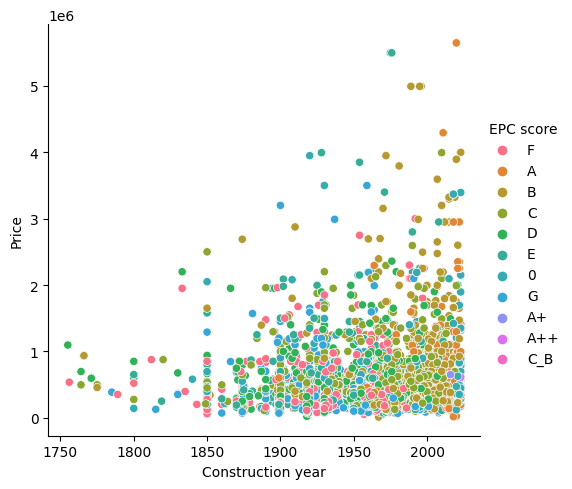

In [16]:
filtered_df = df[(df['Construction year'] >= 1700) & (df['Construction year'] <= 2023)]
sns.relplot(x="Construction year", y="Price", data=filtered_df, kind="scatter", hue="EPC score")
plt.show()

In [17]:
expensive_prop = df[df["Price"]>5000000]
print(expensive_prop)

             id                      Street Housenumber Box  Floor  \
5020   10678548  Niki De Saint Phallestraat           8   0    0.0   
5223    9854478       AVENUE DES EGLANTIERS          35   0    0.0   
6572   10676590                           0           0   0    0.0   
6700   10676512  Niki de Saint Phallestraat           8   0    0.0   
7235   10675426                           0           0   0    0.0   
7813   10660088  Niki de Saint Phallestraat           8   0    0.0   
10714  10671041                           0           0   0    0.0   

                      City Postalcode Property type    Region  District  \
5020          Knokke-Heist       8300   RESIDENTIAL  FLANDERS    Brugge   
5223                 Uccle       1180             0  BRUSSELS  Brussels   
6572                 Uccle       1180             0  BRUSSELS  Brussels   
6700          Knokke-Heist       8300         URBAN  FLANDERS    Brugge   
7235   Knokke-Heist Knokke       8300             0  FLANDERS   

In [50]:
property_count= df["Region"].value_counts().reset_index()
property_count.columns = ['Region', 'property_count']
display(property_count)

,Region,property_count
0,FLANDERS,4834
1,WALLONIE,2524
2,BRUSSELS,1869
3,0,48


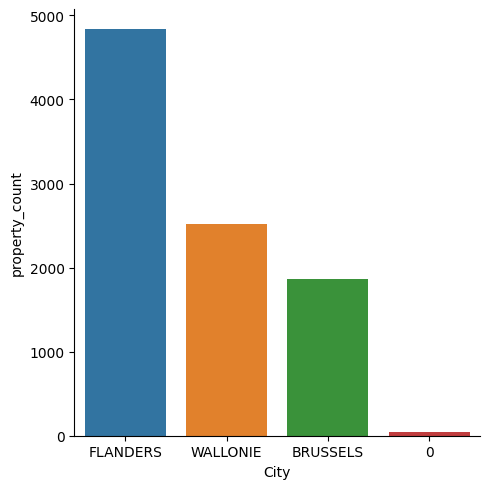

In [29]:
sns.catplot(x="City", y="property_count", data=property_count, kind="bar")
plt.show()

### Converting postalcode to integer and gadding a new column to the dataframe "Province" depending on the postalcode

In [49]:
zip_to_province = {
    range(1000, 1300): 'Brussels Hoofdstedelijk Gewest',
    range(1300, 1500): 'Provincie Waals-Brabant',
    range(1500, 2000): 'Provincie Vlaams-Brabant',
    range(2000, 3000): 'Provincie Antwerpen',
    range(3000, 3500): 'Provincie Vlaams-Brabant',
    range(3500, 4000): 'Provincie Limburg',
    range(4000, 5000): 'Provincie Luik',
    range(5000, 6000): 'Provincie Namen',
    range(6000, 6600): 'Provincie Henegouwen',
    range(6600, 7000): 'Provincie Luxemburg',
    range(7000, 8000): 'Provincie Henegouwen',
    range(8000, 9000): 'Provincie West-Vlaanderen',
    range(9000, 10000): 'Provincie Oost-Vlaanderen'
    }

def convert_postalcode(postalcode):
    try:
        return int(postalcode)
    except ValueError:
        return None

df["Postalcode"] = df["Postalcode"].apply(convert_postalcode)



# Add a new column 'Province' based on the zip codes
df['Province'] = df['Postalcode'].apply(
    lambda postalcode: next((province for zip_range, province in zip_to_province.items() if postalcode in zip_range), None)
)



                            Province        id                 Street  \
0     Brussels Hoofdstedelijk Gewest   7799663          Avenue Louise   
1     Brussels Hoofdstedelijk Gewest   8848343  Boulevard du Triomphe   
2     Brussels Hoofdstedelijk Gewest  10673525  Chaussée de Charleroi   
3     Brussels Hoofdstedelijk Gewest  10675990                      0   
4     Brussels Hoofdstedelijk Gewest  10675991                      0   
...                              ...       ...                    ...   
9236       Provincie West-Vlaanderen  10328475      Noordhinderstraat   
9237       Provincie West-Vlaanderen  10329448        Hondschootebaan   
9238       Provincie West-Vlaanderen  10332739             Neerstraat   
9239       Provincie West-Vlaanderen  10341800           Bruggestraat   
9240       Provincie West-Vlaanderen  10684085                      0   

     Housenumber    Box  Floor              City  Postalcode Property type  \
0            401      0    5.0           Ixel

#### Creating a dataframe for grouping the properties by province and plotting it

In [53]:
# Group the cities by province
grouped_by_province = df['Province'].value_counts().reset_index()
grouped_by_province.columns = ["Province","property_count"]
print(grouped_by_province)

                          Province  property_count
0   Brussels Hoofdstedelijk Gewest            1869
1        Provincie West-Vlaanderen            1312
2        Provincie Oost-Vlaanderen            1250
3              Provincie Antwerpen            1107
4         Provincie Vlaams-Brabant             917
5                   Provincie Luik             876
6             Provincie Henegouwen             626
7          Provincie Waals-Brabant             446
8              Provincie Luxemburg             290
9                  Provincie Namen             289
10               Provincie Limburg             259


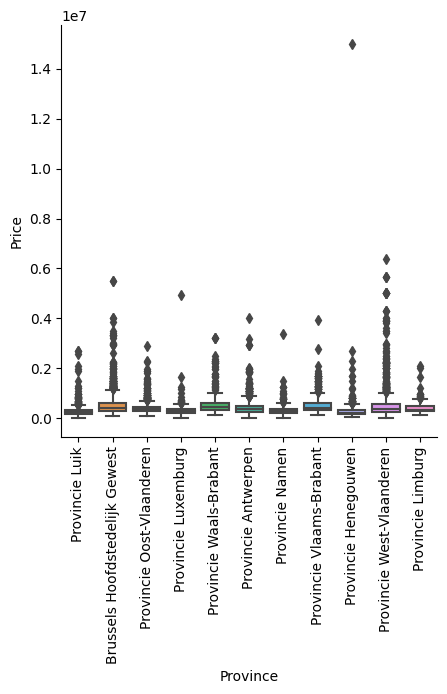

In [65]:
#Plotting the properties province wise

sns.catplot(x="Province", y="Price", data=df, kind="box")
plt.xticks(rotation=90)
plt.show()

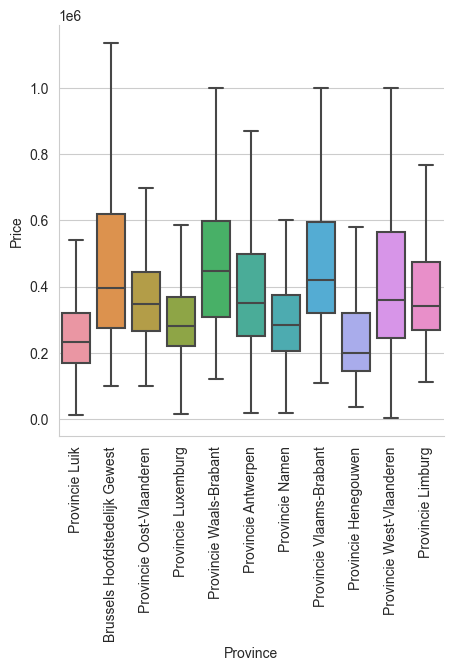

In [86]:
#Plotting the properties province wise

sns.catplot(x="Province", y="Price", data=df, kind="box",sym="")
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.show()

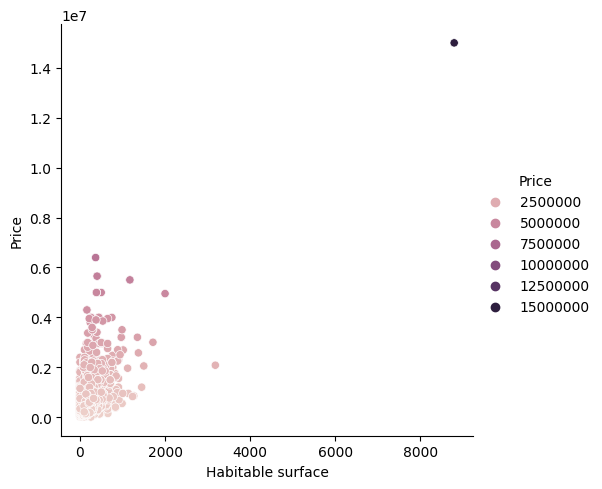

In [81]:
# Comparision of price of a property with habitable surface area

sns.relplot(x="Habitable surface", y="Price", data=df, kind="scatter", hue="Price")
plt.show()

In [73]:
except_habt = df[df["Habitable surface"]> 2000]
display(except_habt)

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,...,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude,Province
6879,10676384,De Schiervellaan,26,0,0.0,Hasselt,3500.0,URBAN,FLANDERS,Hasselt,MANSION,2080000.0,residential_sale,1908.0,...,3182.0,0,0,False,0,0,2705.0,4.0,0,TO_BE_DONE_UP,0,50.928703,5.33317,Provincie Limburg
10714,10671041,0,0,0,0.0,Havré,7021.0,0,WALLONIE,Mons,APARTMENT_BLOCK,15000000.0,residential_sale,0.0,...,8797.0,NOT_INSTALLED,0,True,0,0,43300.0,4.0,0,0,0,0.000000,0.00000,Provincie Henegouwen


In [80]:
type_property = df["Subtype"].value_counts().reset_index()
type_property.columns = ["Subtype", "count"]
print(type_property)

                 Subtype  count
0                  HOUSE   3758
1              APARTMENT   3148
2                  VILLA    571
3        APARTMENT_BLOCK    263
4                 DUPLEX    253
5              PENTHOUSE    232
6           GROUND_FLOOR    189
7     MIXED_USE_BUILDING    185
8            FLAT_STUDIO    168
9   EXCEPTIONAL_PROPERTY     80
10               MANSION     69
11            TOWN_HOUSE     63
12       COUNTRY_COTTAGE     51
13                  LOFT     48
14          SERVICE_FLAT     44
15              BUNGALOW     43
16             FARMHOUSE     26
17               TRIPLEX     25
18                CHALET     16
19           MANOR_HOUSE     14
20                   KOT     12
21        OTHER_PROPERTY     12
22                CASTLE      5


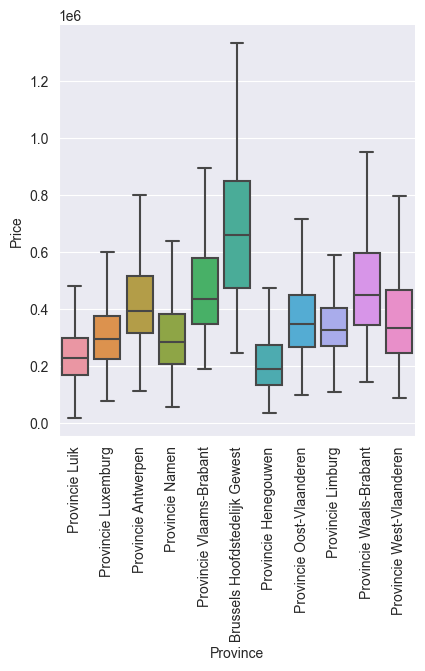

In [93]:
houses_df = df[(df["Subtype"]=="HOUSE") & (df["Habitable surface"]!=0)]
sns.catplot(x="Province", y="Price", data=houses_df, kind="box",sym="")
plt.xticks(rotation=90)
plt.show()

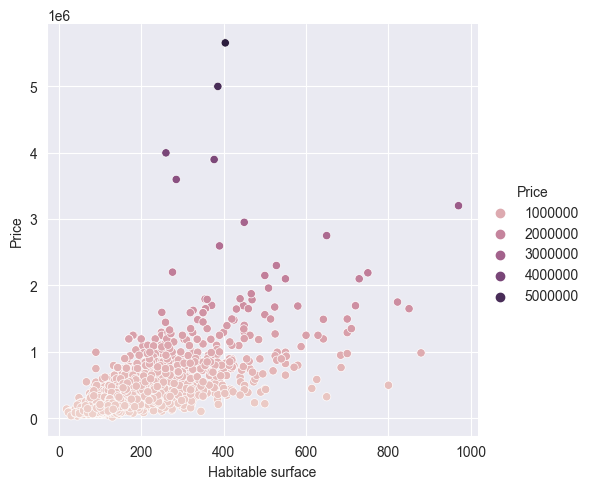

In [94]:
sns.relplot(x="Habitable surface", y="Price", data=houses_df, kind="scatter", hue="Price")

plt.show()

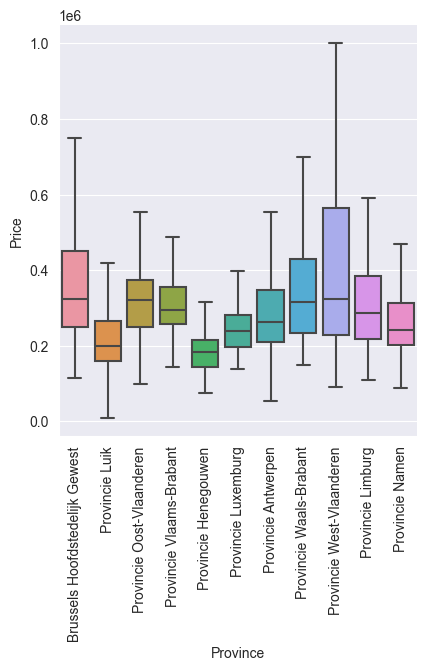

In [98]:
apartment_df = df[(df["Subtype"]=="APARTMENT") & (df["Habitable surface"]!=0)]
sns.catplot(x="Province", y="Price", data=apartment_df, kind="box",sym="")
plt.xticks(rotation=90)
plt.show()

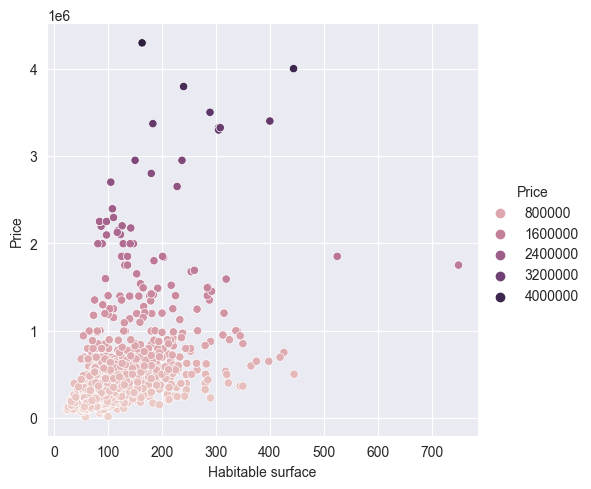

In [100]:
sns.relplot(x="Habitable surface", y="Price", data=apartment_df, kind="scatter", hue="Price")

plt.show()

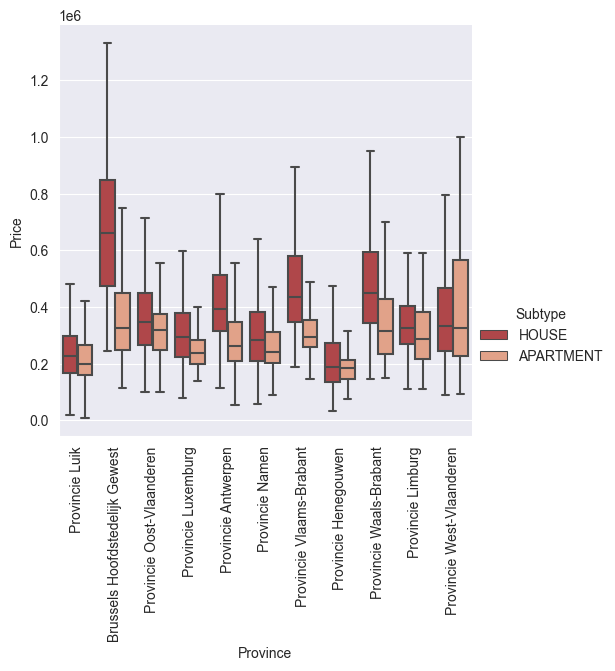

In [106]:
apartment_df = df[df["Subtype"].isin(["APARTMENT","HOUSE"]) & (df["Habitable surface"]!=0)]
sns.catplot(x="Province", y="Price", data=apartment_df, kind="box", hue="Subtype", sym="")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()